In [1]:
import pandas as pd
df = pd.read_excel('NewChurn.xlsx')
y = df.churn
X = df.iloc[:,:-1].values

df.head()

,Age,Prof,Loc,MarStat,Child,Inc,NumH,Hage,Smart,Price,...,InCall,Peak,Change,Drop,LHrs,Care,Rec,RetR,Ncalls,churn
0,26,2,6,2,1,6,1,1812,0,0.00,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,36,0,0,2,1,9,4,544,1,79.99,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,74,4,6,2,0,7,2,138,1,29.99,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,30,0,4,0,0,6,3,122,1,9.99,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,32,0,6,2,0,7,8,10,1,129.99,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [2]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, max_depth=17)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=17, random_state=0)

Text(0, 0.5, 'Feature Importance')

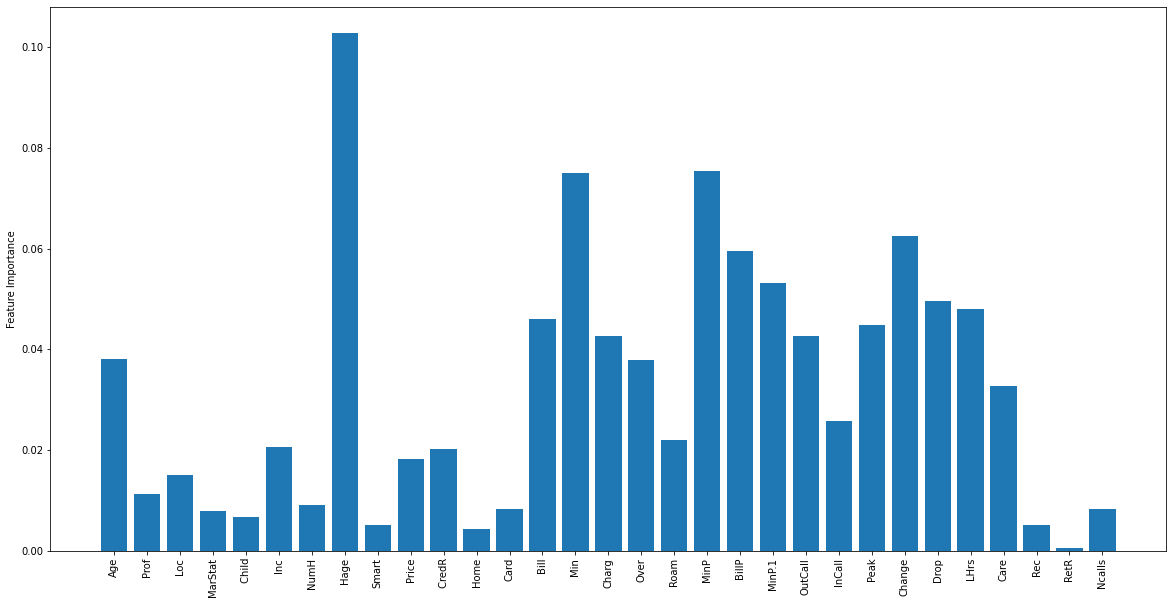

In [3]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

figure(figsize=(20, 10))

feature_indices = np.arange(df.shape[1]-1) 
plt.bar(feature_indices,clf.tree_.compute_feature_importances())
plt.xticks(feature_indices, df.columns[:-1], rotation='vertical')
plt.ylabel('Feature Importance')

- we can see that hage MinP and Min are the most important feature

Now we evaluate the predictive accuracy of the random forests (decision tree).

In [7]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X)

Lets look at the Confusion Matrix:  the matrix of true and false decisions We see that it is quite accurate for the full sample.

In [8]:
CM = confusion_matrix(y, pred, normalize='true')
CM

array([[0.8394, 0.1606],
       [0.1704, 0.8296]])

Lets do a repeat set of draws for in an out of sample tests.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

num_experiments =500
K = 7500
N = df.shape[0]
test_size = 1-K/N

false_positives = []
false_negatives = []
accuracies = []
#clf = RandomForestClassifier()
clf = DecisionTreeClassifier(random_state=0, max_depth=16)
for experiment in (range(num_experiments)):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CM = confusion_matrix(y_test, pred, normalize='true')
    
    false_positives.append(CM[0,1])# it was actually negative class (0-th row in the CM), and falsely predicted positve(1-th column)
    false_negatives.append(CM[1,0])
    accuracies.append(accuracy_score(y_test, pred))
    

Text(0.5, 1.0, 'False negatives')

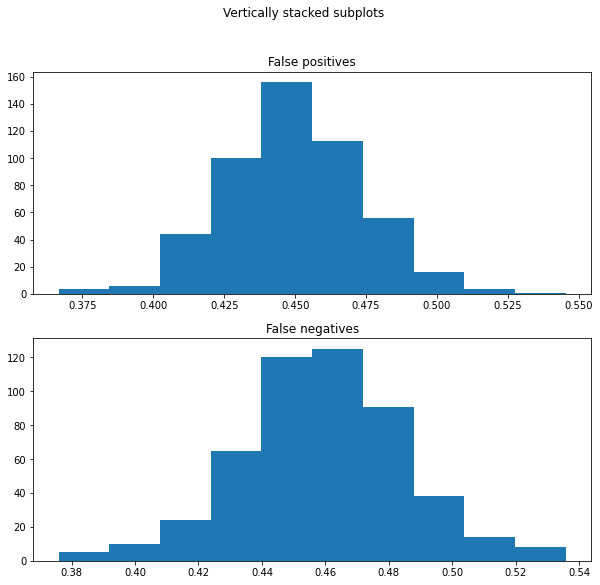

In [13]:
fig, axs = plt.subplots(2, figsize=(10, 9))
fig.suptitle('Vertically stacked subplots')
axs[0].hist(false_positives)
axs[0].set_title('False positives')

axs[1].hist(false_negatives)
axs[1].set_title('False negatives')


In [11]:
accuracies

[0.5484,
 0.5448,
 0.552,
 0.5504,
 0.5404,
 0.5532,
 0.546,
 0.5576,
 0.5552,
 0.5408,
 0.5436,
 0.5576,
 0.5368,
 0.536,
 0.5404,
 0.5424,
 0.546,
 0.5328,
 0.5416,
 0.5452,
 0.5576,
 0.5196,
 0.538,
 0.5376,
 0.5436,
 0.5536,
 0.5536,
 0.5296,
 0.546,
 0.5568,
 0.5496,
 0.5396,
 0.5592,
 0.556,
 0.5608,
 0.536,
 0.5336,
 0.5532,
 0.5408,
 0.5536,
 0.5448,
 0.5296,
 0.5496,
 0.5544,
 0.554,
 0.5472,
 0.542,
 0.5416,
 0.5616,
 0.538,
 0.5336,
 0.5548,
 0.5284,
 0.53,
 0.5424,
 0.562,
 0.542,
 0.544,
 0.5424,
 0.5224,
 0.5468,
 0.5428,
 0.5404,
 0.5344,
 0.5336,
 0.546,
 0.5496,
 0.5312,
 0.5256,
 0.5388,
 0.5432,
 0.5316,
 0.5348,
 0.5424,
 0.528,
 0.5356,
 0.5456,
 0.5532,
 0.5356,
 0.5508,
 0.5644,
 0.5344,
 0.532,
 0.5332,
 0.5328,
 0.5544,
 0.5548,
 0.5352,
 0.5344,
 0.5352,
 0.5676,
 0.5468,
 0.5432,
 0.5392,
 0.556,
 0.54,
 0.5388,
 0.5548,
 0.546,
 0.5492,
 0.5424,
 0.5468,
 0.5556,
 0.5484,
 0.5352,
 0.5604,
 0.5528,
 0.5444,
 0.552,
 0.5332,
 0.5428,
 0.542,
 0.5292,
 0.5516,

We see the out of sample predictive accuracy stats, very different.

$\textbf{Churn Data: Neural Network Prediction}$

Now lets look at the same data with neural net prediction.
We load in the data and then set up a patternnet neural neet with 31 neurons.
We put in options not to show the intermediate training data in windows.

In [157]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('NewChurn.xlsx')
y = df.churn
X = df.iloc[:,:-1].values
X = MinMaxScaler().fit_transform(X)
df.head()

,Age,Prof,Loc,MarStat,Child,Inc,NumH,Hage,Smart,Price,...,InCall,Peak,Change,Drop,LHrs,Care,Rec,RetR,Ncalls,churn
0,26,2,6,2,1,6,1,1812,0,0.00,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,0
1,36,0,0,2,1,9,4,544,1,79.99,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,0
2,74,4,6,2,0,7,2,138,1,29.99,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,0
3,30,0,4,0,0,6,3,122,1,9.99,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,0
4,32,0,6,2,0,7,8,10,1,129.99,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,0


In [159]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(31), max_iter=27).fit(X, y)
clf.fit(X,y)

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=31, max_iter=27, random_state=1)

In [161]:
pred = clf.predict(X) # note, 1 is positive class
accuracy = accuracy_score(y,pred)

CM = confusion_matrix(y, pred, normalize='true')
true_positive = CM[1,1]
true_negative = CM[0,0]
false_positive = CM[0,1]
false_negative = CM[1,0]



In [162]:
accuracy

0.589

We have an almost 60% accuracy rate, not bad.

Lets simulate the model around the median to get the relative importance.

In [181]:
X_median = np.median(X, axis=0).reshape((1,-1)) # (1,D)
proba_median = clf.predict_proba(X_median)
proba_median.shape

(1, 2)

In [182]:
proba_median

array([[0.55281896, 0.44718104]])

Text(0, 0.5, 'Feature Importance')

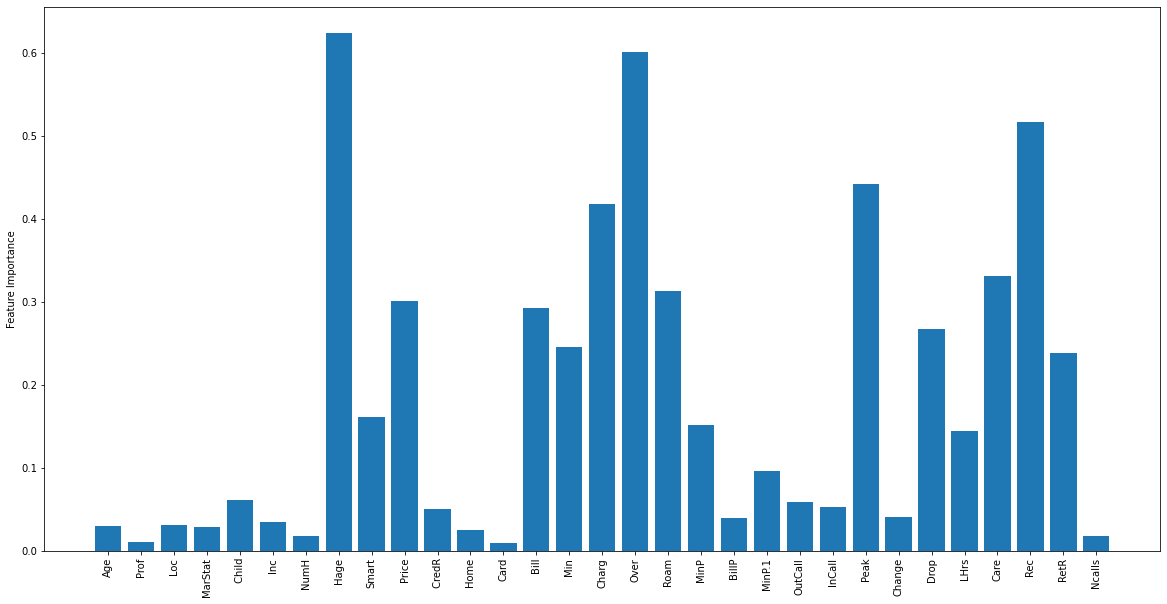

In [183]:
D = X.shape[1]
importance = []
for i in range(D):
    #print(x_median_i_perturbed)
    x_median_i_perturbed = X_median.copy()
    x_median_i_perturbed[0,i]+=0.00001
    
    proba_median_perturbed = clf.predict_proba(x_median_i_perturbed)
    imp = abs(proba_median_perturbed[:,1] - proba_median[:,1])/0.00001 
    importance.append(imp)
importance = np.array(importance).reshape(-1)
    
feature_indices = np.arange(len(importance))

figure(figsize=(20, 10))
plt.bar(feature_indices,importance)
plt.xticks(feature_indices, df.columns[:-1], rotation='vertical')
plt.ylabel('Feature Importance')


Now let's look at out of sample performance of the network.

In [185]:
K = 9000
N = y.shape[0]
test_size = 1-K/N

false_positives = []
false_negatives = []
accuracies = []

for j in range(100):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size)
    clf = MLPClassifier(random_state=1, hidden_layer_sizes=(31), max_iter=27).fit(X, y)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CM = confusion_matrix(y_test, pred, normalize='true')
    
    false_positives.append(CM[0,1])# it was actually negative class (0-th row in the CM), and falsely predicted positve(1-th column)
    false_negatives.append(CM[1,0])
    accuracies.append(accuracy_score(y_test, pred))
    
    

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converge

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converge

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converge

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converge

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converge

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converge

/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/disk3/programs/Anaconda3/envs/sync/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'False negatives')

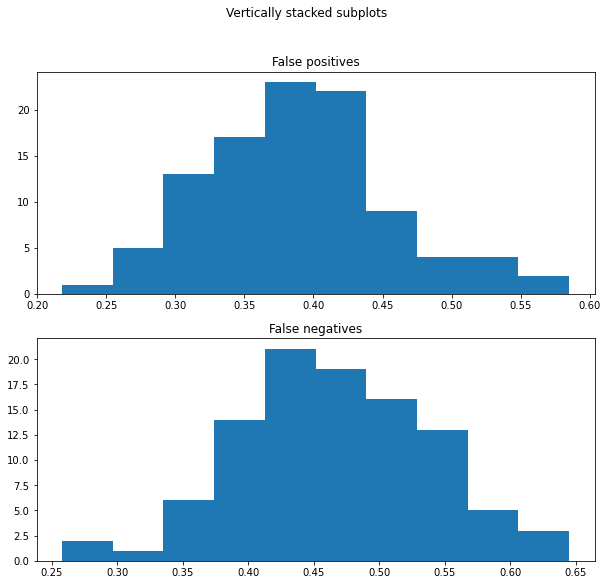

In [186]:
fig, axs = plt.subplots(2, figsize=(10, 9))
fig.suptitle('Vertically stacked subplots')
axs[0].hist(false_positives)
axs[0].set_title('False positives')

axs[1].hist(false_negatives)
axs[1].set_title('False negatives')
